<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 7. Задача Обучение без учителя
## <center>Практика. Кластеризация данных с акселерометров и гироскопов мобильных телефонов

**Считываем <a href="https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones">данные</a> Samsung Human Activity Recognition.**

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


**Считаем данные, объединим обучающую и тестовую выборки. Метки y будем использовать для оценки качества кластеризации. Конечно, kMeans не будет ничего о них "знать".**

In [2]:
X = np.vstack((np.loadtxt("/home/chepiov/Downloads/samsung_activities/samsung_train.txt"), 
        np.loadtxt("/home/chepiov/Downloads/samsung_activities/samsung_test.txt")))

y = np.hstack((np.loadtxt("/home/chepiov/Downloads/samsung_activities/samsung_train_labels.txt"), 
        np.loadtxt("/home/chepiov/Downloads/samsung_activities/samsung_test_labels.txt"))).astype(int)

**Опеределим число уникальных значений меток целевого класса. Эти метки соответствуют ходьбе (1), подъему вверх по лестнице (2), спуску по лестнице (3), сидению (4), стоянию (5) и лежанию (6). [Описание](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)**

In [3]:
k = len(np.unique(y))
k

6

**Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить 90% дисперсии.**

In [4]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

X = PCA(0.9).fit_transform(scale(X))
X.shape

(10299, 65)

**Визуализируем данные в проекции на первые две главные компоненты.**

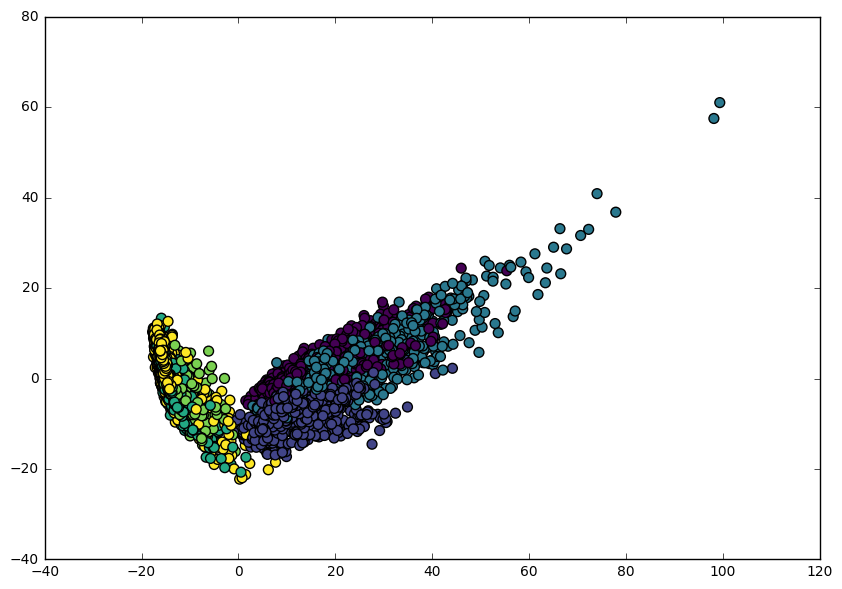

In [5]:
figure(figsize=(10,7))
scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');

**Сделайте кластеризацию данных методом KMeans. Задайте параметр *n_clusters*, равный *k* - найденному ранее числу уникальных меток целевого класса.**

In [6]:
predictions = KMeans(n_clusters=k).fit(X).labels_

**Посмотрите на соответствие между метками кластеров и исходными метками классов. Посмотрите, какие виды активностей алгоритм KMeans путает.**

In [7]:
from pandas import crosstab

crosstab(predictions, y)

col_0,1,2,3,4,5,6
row_0,,,,,,
0,0,0,0,90,0,1556
1,904,1241,320,1,0,5
2,0,0,0,1235,1344,53
3,78,5,196,0,0,0
4,740,296,890,0,0,0
5,0,2,0,451,562,330


**Посчитайте метрики качества кластеризации ARI, AMI, гомогенность, полноту и силуэт.**

In [12]:
from sklearn import metrics

print('ARI =', metrics.adjusted_rand_score(y, predictions))
print('AMI =', metrics.adjusted_mutual_info_score(y, predictions))
print('Homogeneity =', metrics.homogeneity_score(y, predictions))
print('Completeness =', metrics.completeness_score(y, predictions))
print('V-measure =', metrics.v_measure_score(y, predictions))
print('Silhouette =', metrics.silhouette_score(X, predictions))

ARI = 0.419495646579
AMI = 0.540257304701
Homogeneity = 0.540570279663
Completeness = 0.580966953187
V-measure = 0.560041092102
Silhouette = 0.141497594676


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=300, random_state=42)
cross_val_score(rf, X, y, cv=5)



# 
# rf.fit(X, y)



array([ 0.89869123,  0.84764677,  0.85478388,  0.89558038,  0.88964511])